In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
import cv2

In [4]:
from keras import backend as K

In [5]:
training_classes = ['Corn spot','Corn healthy', 'Corn rust','Peach healthy','Peach rust']

In [6]:
import os

dim = (100,100)
corn, corn_, corn__, peach_, peach  = [],[],[],[],[]
def load_images_from_folder(folder, cat):
    
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
        if img is not None:
            images.append([img, cat])
    return images

In [7]:
corn = load_images_from_folder(folder='Training_Dataset/Corn spot',cat=0)
print(len(corn))

410


In [8]:
corn_ = load_images_from_folder(folder='Training_Dataset/Corn rust', cat=1)
print(len(corn_))

corn__ = load_images_from_folder(folder='Training_Dataset/Corn healthy/', cat=2)
print(len(corn__))

peach = load_images_from_folder(folder='Training_Dataset/Peach healthy/', cat=3)
print(len(peach))

peach_ = load_images_from_folder(folder='Training_Dataset/Peach rust/', cat=4)
print(len(peach_))

953
929
288
1838


In [9]:
corn = corn+corn_[:500]+corn__[:500]+peach+peach_[:500]

In [10]:
len(corn)

2198

In [11]:
import random
random.shuffle(corn)

In [12]:
corn

[[array([[[162, 157, 159],
          [162, 157, 159],
          [162, 157, 159],
          ...,
          [126, 122, 127],
          [130, 126, 131],
          [128, 124, 129]],
  
         [[163, 158, 160],
          [164, 159, 161],
          [164, 159, 161],
          ...,
          [128, 124, 129],
          [127, 123, 128],
          [127, 123, 128]],
  
         [[166, 161, 163],
          [166, 161, 163],
          [166, 161, 163],
          ...,
          [133, 129, 134],
          [128, 124, 129],
          [126, 122, 127]],
  
         ...,
  
         [[154, 152, 151],
          [156, 154, 153],
          [157, 155, 154],
          ...,
          [ 23,  91,  87],
          [  7,  57,  69],
          [  6,  52,  75]],
  
         [[154, 152, 151],
          [156, 154, 153],
          [158, 156, 155],
          ...,
          [ 50, 110, 104],
          [ 34,  77,  85],
          [ 11,  41,  58]],
  
         [[155, 153, 152],
          [159, 157, 156],
          [154, 152, 151

In [13]:
x, y = [],[]
for features,labels in corn:
    x.append(features/255.0)
    y.append(labels)

In [14]:
x

[array([[[0.63529412, 0.61568627, 0.62352941],
         [0.63529412, 0.61568627, 0.62352941],
         [0.63529412, 0.61568627, 0.62352941],
         ...,
         [0.49411765, 0.47843137, 0.49803922],
         [0.50980392, 0.49411765, 0.51372549],
         [0.50196078, 0.48627451, 0.50588235]],
 
        [[0.63921569, 0.61960784, 0.62745098],
         [0.64313725, 0.62352941, 0.63137255],
         [0.64313725, 0.62352941, 0.63137255],
         ...,
         [0.50196078, 0.48627451, 0.50588235],
         [0.49803922, 0.48235294, 0.50196078],
         [0.49803922, 0.48235294, 0.50196078]],
 
        [[0.65098039, 0.63137255, 0.63921569],
         [0.65098039, 0.63137255, 0.63921569],
         [0.65098039, 0.63137255, 0.63921569],
         ...,
         [0.52156863, 0.50588235, 0.5254902 ],
         [0.50196078, 0.48627451, 0.50588235],
         [0.49411765, 0.47843137, 0.49803922]],
 
        ...,
 
        [[0.60392157, 0.59607843, 0.59215686],
         [0.61176471, 0.60392157, 0.6    

In [15]:
y

[4,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 4,
 3,
 4,
 2,
 2,
 3,
 4,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 3,
 1,
 4,
 4,
 0,
 1,
 3,
 0,
 0,
 2,
 2,
 4,
 2,
 0,
 1,
 4,
 1,
 4,
 1,
 4,
 2,
 3,
 4,
 2,
 0,
 2,
 4,
 0,
 2,
 4,
 3,
 0,
 4,
 4,
 4,
 4,
 3,
 1,
 2,
 3,
 2,
 2,
 0,
 4,
 4,
 1,
 0,
 2,
 3,
 2,
 3,
 3,
 4,
 1,
 3,
 4,
 1,
 0,
 1,
 3,
 2,
 4,
 3,
 4,
 4,
 4,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 4,
 2,
 0,
 3,
 2,
 2,
 3,
 3,
 2,
 0,
 4,
 2,
 4,
 1,
 0,
 3,
 1,
 3,
 1,
 0,
 4,
 3,
 3,
 1,
 3,
 0,
 3,
 2,
 0,
 4,
 4,
 1,
 1,
 1,
 2,
 3,
 4,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 4,
 0,
 1,
 4,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 4,
 3,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 4,
 4,
 1,
 3,
 4,
 1,
 1,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 1,
 4,
 0,
 0,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 4,
 4,
 0,
 3,
 0,
 3,
 1,
 2,
 0,
 4,
 4,
 1,
 1,
 3,
 2,
 1,
 0,
 1,
 4,
 4,
 0,
 3,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 2,
 3,
 0,
 3,
 2,
 4,
 4,
 3,
 0,
 0,
 2,
 0,
 4,
 1,
 3,
 2,
 1,
 3,
 0,
 1,
 2,
 4,
 2,
 1,
 1,
 0,
 3,
 4,


In [16]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=3)

In [17]:
def build(activations = 3):
    
    model = Sequential()
    model.add(Conv2D(256, (3,3), input_shape=x[0].shape))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(activations))
    model.add(Activation('softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
model = build(activations=5)
hist = model.fit(x,y, validation_split=0.2, epochs=100, batch_size=128, callbacks=[es])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1758 samples, validate on 440 samples
Epoch 1/100
1758/1758 [==============================] - 350s 199ms/step - loss: 1.5274 - acc: 0.3680 - val_loss: 1.1945 - val_acc: 0.5727
Epoch 2/100
1758/1758 [==============================] - 201s 114ms/step - loss: 0.9322 - acc: 0.6274 - val_loss: 0.4409 - val_acc: 0.8136
Epoch 3/100
1758/1758 [==============================] - 201s 115ms/step - loss: 0.4157 - acc: 0.8356 - val_loss: 0.4073 - val_acc: 0.8023
Epoch 4/100
1758/1758 [==============================] - 200s 114ms/step - loss: 0.3559 - acc: 0.8458 - val_loss: 0.2423 - val_acc: 0.9136
Epoch 5/100
1758/1758 [==============================] - 201s 114ms/step - loss: 0.2338 - acc: 0.9147 - val_loss: 0.1622 - val_acc: 0.9386
Epoch 6/100
1758/1758 [==============================] - 206s 117ms/step - loss: 0.1560 - acc: 0.9380 - val_loss: 0.0924 - val_acc: 0.9682

In [20]:
import time
__name = 'disease_prediction_cnn_new_{}'.format(int(time.time()))
model.save(__name)

In [21]:
def build_dense(activations=3):
    
    model=Sequential()
    
    model.add(Dense(256, input_shape=x[0].shape))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(activations))
    model.add(Activation('softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
    

In [22]:
dense_mod = build_dense(5)

In [23]:
history = dense_mod.fit(x,y, validation_split=0.2, batch_size=128, epochs=20, callbacks=[es])

Train on 1758 samples, validate on 440 samples
Epoch 1/20
1758/1758 [==============================] - 221s 126ms/step - loss: 1.2832 - acc: 0.5324 - val_loss: 0.4842 - val_acc: 0.7909
Epoch 2/20
1758/1758 [==============================] - 223s 127ms/step - loss: 0.3707 - acc: 0.8618 - val_loss: 0.1447 - val_acc: 0.9659
Epoch 3/20
1758/1758 [==============================] - 223s 127ms/step - loss: 0.1104 - acc: 0.9642 - val_loss: 0.0662 - val_acc: 0.9705
Epoch 4/20
1758/1758 [==============================] - 222s 126ms/step - loss: 0.0482 - acc: 0.9824 - val_loss: 0.0600 - val_acc: 0.9841
Epoch 5/20
1758/1758 [==============================] - 222s 127ms/step - loss: 0.0344 - acc: 0.9898 - val_loss: 0.0555 - val_acc: 0.9773
Epoch 6/20
1758/1758 [==============================] - 222s 126ms/step - loss: 0.0198 - acc: 0.9960 - val_loss: 0.0433 - val_acc: 0.9795
Epoch 7/20
1758/1758 [==============================] - 224s 127ms/step - loss: 0.0122 - acc: 0.9989 - val_loss: 0.1154 - val

In [24]:
import time
NAME = 'dense_disease_prediction_latest_{}'.format(int(time.time()))
dense_mod.save(NAME)

In [25]:
def get_prediction(image_path, model_name='disease_prediction_cnn_new_1572812619'):
    
    import keras
    from keras.models import Sequential
    
    training_classes = ['Corn spot','Corn healthy', 'Corn rust','Peach healthy','Peach rusty']
    model = keras.models.load_model(model_name)
    pred = 0
    
    #process image
    
    import matplotlib.pyplot as plt
    
    img = cv2.imread(image_path)
    plt.imshow(img)
    img = cv2.resize(img, (100,100), interpolation=cv2.INTER_AREA)
    img = img/255.0
    
    img = np.array(img).astype(float)
    img = img[np.newaxis, ...]

    try:        
        pred = model.predict(img)
        pred = int(round(pred))
    
    except:
        pass
    
    print "Predictions : "
    max_pred = np.sum(pred)
    for i in range(len(training_classes)):
        print training_classes[i] ,": {0:.2f}%".format((pred[0][i]/max_pred)*100)
    return training_classes[np.argmax(pred)]   

Predictions : 
Corn spot : 99.15%
Corn healthy : 0.69%
Corn rust : 0.00%
Peach healthy : 0.01%
Peach rusty : 0.15%


'Corn spot'

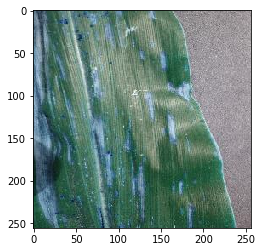

In [29]:
get_prediction(image_path='Training_Dataset/Corn spot/200.jpg')

Predictions : 
Corn spot : 0.00%
Corn healthy : 0.00%
Corn rust : 0.00%
Peach healthy : 99.99%
Peach rusty : 0.01%


'Peach healthy'

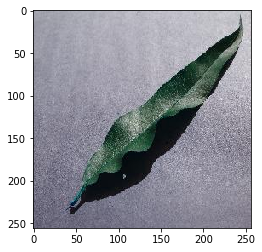

In [30]:
get_prediction(image_path='Training_Dataset/Peach healthy/101.jpg')